#### Create a new notebook to train a baseline model (TrainBaseModel.ipynb)
 * Implement and train a transfer learning model, selecting a model from Keras Built-in Vision Models
* Make sure you look make the learning curves.
* Save the model using model.save() (see Keras Model Saving


### Stratifying sampling
    Attempting to ensure each class/writer is represented in the training set
    (unsuccessful due to errors and failure to train model properly)

In [10]:
ls

Data/                        Vision_TrainBaseModel.ipynb
Vision_Feasibility_ZS.ipynb


In [14]:
! cd Data/Handwriting_Images && ls

w0001 w0010 w0018 w0027 w0034 w0063 w0074 w0083 w0092 w0124 w0133 w0142 w0151
w0002 w0011 w0020 w0028 w0035 w0064 w0075 w0085 w0093 w0125 w0134 w0143 w0152
w0003 w0012 w0022 w0029 w0036 w0066 w0076 w0086 w0094 w0126 w0135 w0144 w0153
w0004 w0013 w0023 w0030 w0038 w0069 w0077 w0087 w0095 w0128 w0136 w0145 w0154
w0005 w0015 w0024 w0031 w0043 w0070 w0078 w0088 w0121 w0129 w0137 w0147 w0155
w0006 w0016 w0025 w0032 w0061 w0071 w0080 w0089 w0122 w0130 w0138 w0148 w0156
w0009 w0017 w0026 w0033 w0062 w0073 w0082 w0091 w0123 w0131 w0139 w0149


In [55]:
writer_ids = """w0001 w0010 w0018 w0027 w0034 w0063 w0074 w0083 w0092 w0124 w0133 w0142 w0151
w0002 w0011 w0020 w0028 w0035 w0064 w0075 w0085 w0093 w0125 w0134 w0143 w0152
w0003 w0012 w0022 w0029 w0036 w0066 w0076 w0086 w0094 w0126 w0135 w0144 w0153
w0004 w0013 w0023 w0030 w0038 w0069 w0077 w0087 w0095 w0128 w0136 w0145 w0154
w0005 w0015 w0024 w0031 w0043 w0070 w0078 w0088 w0121 w0129 w0137 w0147 w0155
w0006 w0016 w0025 w0032 w0061 w0071 w0080 w0089 w0122 w0130 w0138 w0148 w0156
w0009 w0017 w0026 w0033 w0062 w0073 w0082 w0091 w0123 w0131 w0139 w0149"""

w_ids = writer_ids.split()
len(w_ids)

90

In [177]:
w_ids.sort()

In [179]:
w_ids

['w0001',
 'w0002',
 'w0003',
 'w0004',
 'w0005',
 'w0006',
 'w0009',
 'w0010',
 'w0011',
 'w0012',
 'w0013',
 'w0015',
 'w0016',
 'w0017',
 'w0018',
 'w0020',
 'w0022',
 'w0023',
 'w0024',
 'w0025',
 'w0026',
 'w0027',
 'w0028',
 'w0029',
 'w0030',
 'w0031',
 'w0032',
 'w0033',
 'w0034',
 'w0035',
 'w0036',
 'w0038',
 'w0043',
 'w0061',
 'w0062',
 'w0063',
 'w0064',
 'w0066',
 'w0069',
 'w0070',
 'w0071',
 'w0073',
 'w0074',
 'w0075',
 'w0076',
 'w0077',
 'w0078',
 'w0080',
 'w0082',
 'w0083',
 'w0085',
 'w0086',
 'w0087',
 'w0088',
 'w0089',
 'w0091',
 'w0092',
 'w0093',
 'w0094',
 'w0095',
 'w0121',
 'w0122',
 'w0123',
 'w0124',
 'w0125',
 'w0126',
 'w0128',
 'w0129',
 'w0130',
 'w0131',
 'w0133',
 'w0134',
 'w0135',
 'w0136',
 'w0137',
 'w0138',
 'w0139',
 'w0142',
 'w0143',
 'w0144',
 'w0145',
 'w0147',
 'w0148',
 'w0149',
 'w0151',
 'w0152',
 'w0153',
 'w0154',
 'w0155',
 'w0156']

In [181]:
! cd Data/Handwriting_Images/w0001 && ls

w0001_s01_pLND_r01.png w0001_s02_pLND_r01.png w0001_s03_pLND_r01.png
w0001_s01_pLND_r02.png w0001_s02_pLND_r02.png w0001_s03_pLND_r02.png
w0001_s01_pLND_r03.png w0001_s02_pLND_r03.png w0001_s03_pLND_r03.png
w0001_s01_pPHR_r01.png w0001_s02_pPHR_r01.png w0001_s03_pPHR_r01.png
w0001_s01_pPHR_r02.png w0001_s02_pPHR_r02.png w0001_s03_pPHR_r02.png
w0001_s01_pPHR_r03.png w0001_s02_pPHR_r03.png w0001_s03_pPHR_r03.png
w0001_s01_pWOZ_r01.png w0001_s02_pWOZ_r01.png w0001_s03_pWOZ_r01.png
w0001_s01_pWOZ_r02.png w0001_s02_pWOZ_r02.png w0001_s03_pWOZ_r02.png
w0001_s01_pWOZ_r03.png w0001_s02_pWOZ_r03.png w0001_s03_pWOZ_r03.png


In [182]:
s_ids = ["01","02","03"]
p_ids = ["LND","PHR","WOZ"]
r_ids = s_ids.copy()

In [183]:
picture = f"{w_id}_s{s_id}_p{p_id}_r{r_id}"

In [306]:
image_path = "/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/"

In [308]:
paths = list()
for w_id in w_ids:
    writer = list()
    for s_id in s_ids:
        for p_id in p_ids:
            for r_id in r_ids:
                writer.append(f"{image_path}{w_id}/{w_id}_s{s_id}_p{p_id}_r{r_id}")
    paths.append(writer)

len(paths[0])

27

In [309]:
paths[30]

['/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pLND_r01',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pLND_r02',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pLND_r03',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pPHR_r01',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pPHR_r02',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pPHR_r03',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pWOZ_r01',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w0036/w0036_s01_pWOZ_r02',
 '/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images/w

In [310]:
import random

In [311]:
round(27*0.8)

22

In [312]:
train_paths = list()
val_paths = list()

for writer in paths:
    random.shuffle(writer)
    split = 22  #80/20 split
    train_paths.extend(writer[:split])
    val_paths.extend(writer[split:])

print(f"training images: {len(train_paths)}\nvalidation images: {len(val_paths)}")

training images: 1980
validation images: 450


In [313]:
home_path = "/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project"

In [314]:
import tensorflow as tf
import os
import keras

In [315]:
import numpy as np
import matplotlib.pyplot as plt

In [316]:
all_writers = sorted(os.listdir(f"{home_path}/Data/Handwriting_Images"))
class_names = [d for d in all_writers if os.path.isdir(os.path.join(f"{home_path}/Data/Handwriting_Images", d))]
class_to_index = {name: idx for idx, name in enumerate(class_names)}

In [317]:
def get_label_from_path(path):
    folder_name = tf.strings.split(path, os.sep)[-2]  # second last part of path
    return tf.cast(class_to_index[folder_name.numpy().decode()], tf.int32)

def get_label_tf(path):
    # Wrap the non-TensorFlow version with `tf.py_function`
    label = tf.py_function(get_label_from_path, [path], tf.int32)
    return label

In [318]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)

def process_path(file_path):
    label = get_label_tf(file_path)
    image = tf.io.read_file(file_path)
    image = tf.image.decode_png(image, channels=1)
    image = tf.image.resize(image, [256,256]) 
    return image, label

train_dataset = train_dataset.map(process_path)
train_dataset = train_dataset.batch(32).shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [319]:
val_dataset = tf.data.Dataset.from_tensor_slices(val_paths,)

val_dataset = val_dataset.map(process_path)
val_dataset = val_dataset.batch(32).shuffle(1000).prefetch(tf.data.AUTOTUNE)

In [320]:
def expand_channels(image, label):
    image = tf.image.grayscale_to_rgb(image) 
    return image, label

train_dataset = train_dataset.map(expand_channels)
val_dataset = val_dataset.map(expand_channels)

In [333]:
from pathlib import Path

base_dir = Path("/Users/zainabsiddiqui/Downloads/Data_Problems/Vision_Project/Data/Handwriting_Images")

all_image_paths = list(base_dir.glob("*/*.png")) 
print(len(all_image_paths))


2430


In [395]:
from collections import defaultdict

writer_to_paths = defaultdict(list)

for path in all_image_paths:
    writer_id = path.parent.name  # folder name
    writer_to_paths[writer_id].append(path)

# now stratify
train_paths = []
val_paths = []

for writer, paths in writer_to_paths.items():
    random.shuffle(paths)
    split = int(0.8 * len(paths))  # 80/20 split
    train_paths.extend(paths[:split])
    val_paths.extend(paths[split:])

def get_label(path):
    return path.parent.name

def process_path(file_path):
    label = get_label(file_path)
    img = tf.io.read_file(str(file_path))
    img = tf.image.decode_png(img, channels=3) 
    img = tf.image.resize(img, [224,224])
    return img, label

# Turn writer names into class indices
label_names = sorted(writer_to_paths.keys())
label_to_index = {name: index for index, name in enumerate(label_names)}


keys_tensor = tf.constant(list(label_to_index.keys()))
vals_tensor = tf.constant(list(label_to_index.values()), dtype=tf.int64)
table = tf.lookup.StaticHashTable(
    initializer=tf.lookup.KeyValueTensorInitializer(keys_tensor, vals_tensor),
    default_value=-1  
)


def process_path_with_index(file_path):
    parts = tf.strings.split(file_path, os.sep)
    label_str = parts[-2]
    label_idx = table.lookup(label_str)

    img = tf.io.read_file(file_path)
    img = tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [224,224])
    img = tf.cast(img, tf.float32) / 255.0  # normalize

    return img, label_idx


train_ds = tf.data.Dataset.from_tensor_slices([str(p) for p in train_paths])
train_ds = train_ds.map(process_path_with_index)

val_ds = tf.data.Dataset.from_tensor_slices([str(p) for p in val_paths])
val_ds = val_ds.map(process_path_with_index)

BATCH_SIZE = 8
train_ds = train_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


## Model

In [379]:
from keras.applications import ResNet50V2

In [380]:
from keras import layers

In [399]:
base_model = ResNet50V2(include_top = False,
                        classifier_activation="softmax",
                        weights = "imagenet",
                        input_shape=(224,224, 3)
                        )

In [401]:
def make_transfer_model(input_shape, num_classes):
    # Load the pre-trained weights of MobileNetV2 and freeze the weights
    backbone = base_model
    
    backbone.trainable = False

    inputs = layers.Input(input_shape)
    x = keras.applications.resnet.preprocess_input(inputs)
    x = backbone(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.GlobalAveragePooling2D()(x)

    units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)

    return keras.Model(inputs, outputs, name="baseline")

image_size = (224,224)

model = make_transfer_model(input_shape=image_size + (3,), num_classes=90)

In [428]:
train_ds1, val_ds1 = tf.keras.utils.image_dataset_from_directory(
    image_path, 
    labels='inferred',
    color_mode='rgb',
    image_size=(224,224),
    batch_size=8,
    validation_split=0.2,
    subset="both",
    seed=42)


Found 2430 files belonging to 90 classes.
Using 1944 files for training.
Using 486 files for validation.


In [436]:
from tensorflow import data as tf_data

In [438]:
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [444]:
epochs = 10

callbacks = [keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),]

model.compile(
    optimizer= keras.optimizers.Adam(3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.SparseCategoricalAccuracy(name="acc")],
    )

history = model.fit(
    train_ds1, #train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data= val_ds1)#val_ds,)


Epoch 1/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 72s 287ms/step - acc: 0.0406 - loss: 68.4220 - val_acc: 0.0700 - val_loss: 37.6517
Epoch 2/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 67s 274ms/step - acc: 0.0534 - loss: 62.2403 - val_acc: 0.0473 - val_loss: 40.5504
Epoch 3/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 67s 276ms/step - acc: 0.0523 - loss: 60.1606 - val_acc: 0.0947 - val_loss: 34.1427
Epoch 4/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 66s 271ms/step - acc: 0.0430 - loss: 57.1543 - val_acc: 0.0905 - val_loss: 31.9936
Epoch 5/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 69s 284ms/step - acc: 0.0539 - loss: 52.8104 - val_acc: 0.0658 - val_loss: 34.5751
Epoch 6/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 70s 288ms/step - acc: 0.0618 - loss: 48.9935 - val_acc: 0.0741 - val_loss: 26.9719
Epoch 7/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 70s 289ms/step - acc: 0.0824 - loss: 45.0631 - val_acc: 0.1152 - val_loss: 26.2928
Epoch 8/10
243/243 ━━━━━━━━━━━━━━━━━━━━ 69s 282ms/step - acc: 0.0672 - loss: 46.2388 - val_acc: 0.0864 - val_loss: 30.0813
Epoch 9/10
243/2

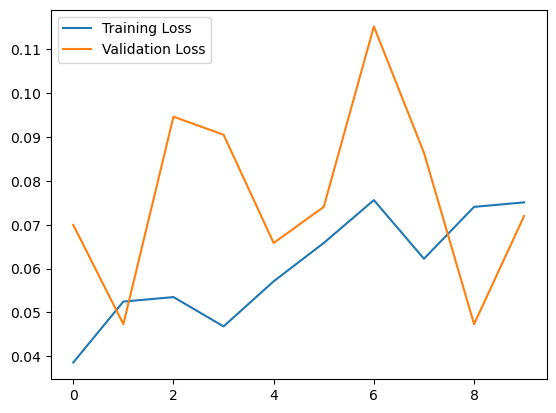

In [445]:
plt.plot(range(len(history.history["acc"])),history.history["acc"],label="Training Accuracy")
plt.plot(range(len(history.history["val_acc"])),history.history["val_acc"],label="Validation Accuracy")
plt.legend()
plt.show()

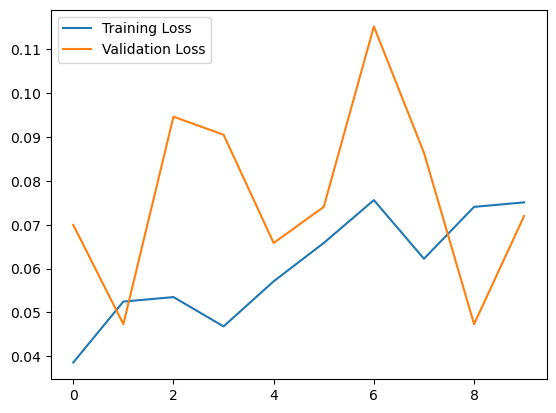

In [473]:
plt.plot(range(len(history.history["loss"])),history.history["acc"],label="Training Loss")
plt.plot(range(len(history.history["val_loss"])),history.history["val_acc"],label="Validation Loss")
plt.legend()
plt.show()

In [442]:
model.save("BaseModel.keras")

#### Colab Baseline with stratified sampling, results

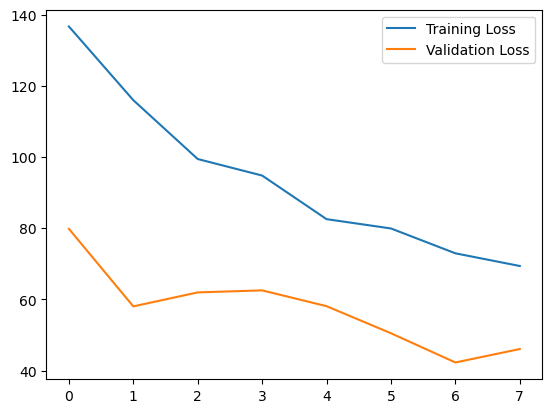

In [471]:
plt.plot(range(8),
         [136.7275,116.0169,99.4707,94.8276,82.5701,79.9546,72.9690,69.4060],
         label="Training Loss")

plt.plot(range(8),
         [79.8570,58.0530,61.9865,62.5520,58.1141,50.5001,42.2873,46.0645],
         label="Validation Loss")
plt.legend()
plt.show()

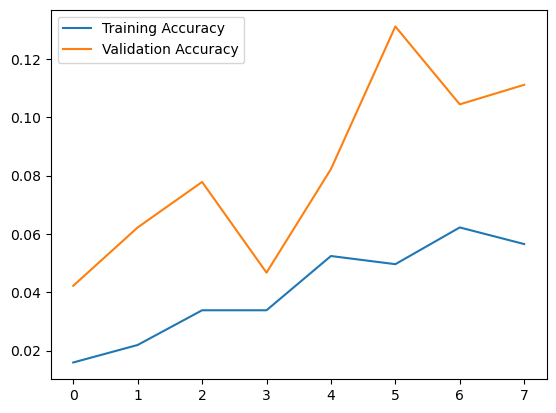

In [465]:
plt.plot(range(8),
         [0.0159,0.0219,0.0338,0.0338,0.0524,0.0496,0.0622,0.0565],
         label="Training Accuracy")

plt.plot(range(8),
         [0.0422,0.0622, 0.0778,0.0467,0.0822,0.1311,0.1044, 0.1111],
         label="Validation Accuracy")
plt.legend()
plt.show()